# Tests and Exercises

url: https://pulser.readthedocs.io/en/stable/intro_rydberg_blockade.html

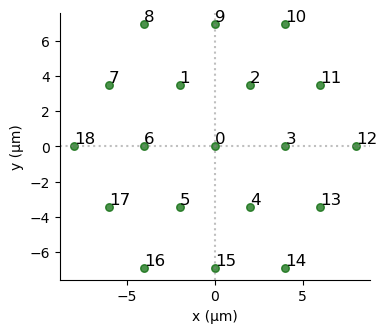

In [2]:
import numpy as np

from pulser import Register, Pulse, Sequence
from pulser.devices import Chadoq2
from pulser.waveforms import RampWaveform, BlackmanWaveform

layers = 2
reg = Register.hexagon(layers=layers)
reg.draw()

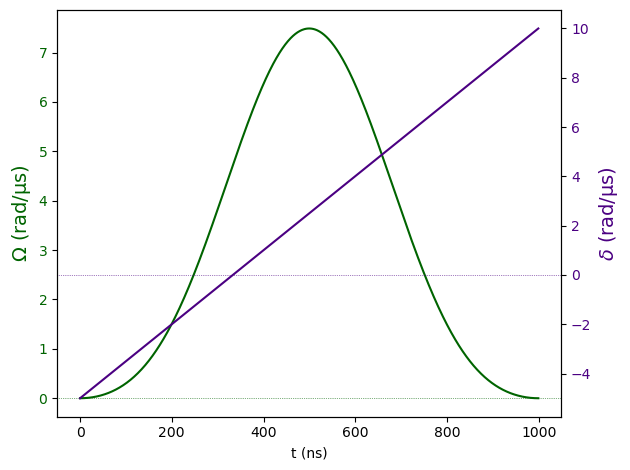

In [3]:
duration = 1000 # ~ 1 microsec
pulse = Pulse(BlackmanWaveform(duration, np.pi), RampWaveform(duration, -5.0, 10.0), 0)
pulse.draw()

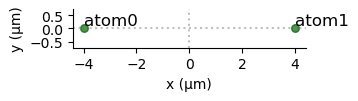

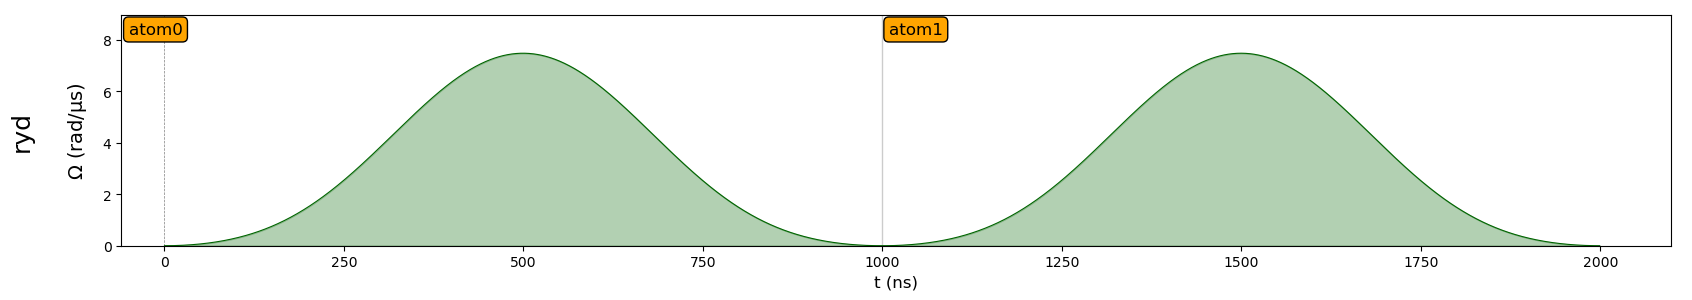

In [4]:
reg = Register.rectangle(1, 2, spacing=8, prefix="atom")
reg.draw()

pi_pulse = Pulse.ConstantDetuning(BlackmanWaveform(duration, np.pi), 0.0, 0.0)

seq = Sequence(reg, Chadoq2)

seq.declare_channel("ryd", "rydberg_local", "atom0")

seq.add(pi_pulse, "ryd")
seq.target("atom1", "ryd")
seq.add(pi_pulse, "ryd")

seq.draw()

In [6]:
Register.draw()

TypeError: Register.draw() missing 1 required positional argument: 'self'